In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 8

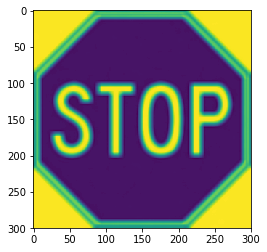

In [3]:
img1 = cv.imread('data/stopSignSample.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
#img2 = cv.imread('data/stopSignSample2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
img2 = cv.imread('data/sign2.ppm',cv.IMREAD_GRAYSCALE) # trainImage

img1 = cv.GaussianBlur(img1,(9,9),7)
# img1 = cv.resize(img1,(100,100))
img2 = cv.resize(img2,(300,300))




sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
pts1 = []
pts2 = []


for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m) 
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

plt.imshow(img1)


In [9]:
if len(good)>MIN_MATCH_COUNT:
    print "Matches Found - %d" % (len(good))
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    M, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
    
    print(M)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None


Matches Found - 11
[[ 3.06380224e-05 -4.61202486e-04  4.57241903e-02]
 [ 3.97841584e-04  6.54809616e-05 -5.90644759e-02]
 [-5.40821096e-02  5.62891317e-02  1.00000000e+00]]


[150 250   1]
[200 250   1]
[200 200   1]
[150 200   1]


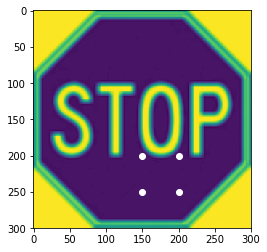

In [6]:

# plt.figure(0)
# plt.imshow(img1)
# plt.plot(50,70, 'o', color="white")

# points = []
# points.append(np.asarray([50,70,1]))

points = []
points.append(np.asarray([150,250,1]))
points.append(np.asarray([200,250,1]))
points.append(np.asarray([200,200,1]))
points.append(np.asarray([150,200,1]))
plt.figure(0)
plt.imshow(img1)
for point in points:
    print(point)
    plt.plot(point[0],point[1], 'o', color="white");

In [7]:

print(points)
transposedPoints = []

for point in points:

    transposedPoints.append(np.dot(M,point))

print(transposedPoints)

[array([150, 250,   1]), array([200, 250,   1]), array([200, 200,   1]), array([150, 200,   1])]
[array([-0.06498073,  0.016982  ,  6.95996649]), array([-0.06344883,  0.03687408,  4.25586101]), array([-0.0403887 ,  0.03360003,  1.44140442]), array([-0.0419206 ,  0.01370795,  4.1455099 ])]


[-0.06498073  0.016982    6.95996649]
[-0.06344883  0.03687408  4.25586101]
[-0.0403887   0.03360003  1.44140442]
[-0.0419206   0.01370795  4.1455099 ]


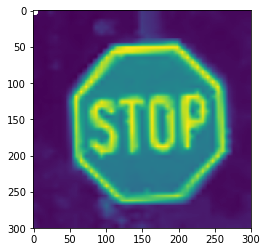

In [8]:
plt.figure(1)
plt.imshow(img2)
for point in transposedPoints:
    print(point)
    plt.plot(point[0],point[1], 'o', color="white");